In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\LANRE\Desktop\ML Wk 4\Week4\Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
len(data)

400

In [4]:
#creating a LabelEncoder object
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
#invoking fit_transform method on object
data['Gender']=le.fit_transform(data['Gender'])

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
User ID            400 non-null int64
Gender             400 non-null int32
Age                400 non-null int64
EstimatedSalary    400 non-null int64
Purchased          400 non-null int64
dtypes: int32(1), int64(4)
memory usage: 14.1 KB


In [6]:
# employees that did not buy and those that bought

left= data.groupby('Purchased')
left.mean()

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,1.569116e+07,0.505837,32.793774,60544.747082
1,1.569222e+07,0.461538,46.391608,86272.727273


In [7]:
data.describe()

,User ID,Gender,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000,400.000000
mean,1.569154e+07,0.490000,37.655000,69742.500000,0.357500
std,7.165832e+04,0.500526,10.482877,34096.960282,0.479864
min,1.556669e+07,0.000000,18.000000,15000.000000,0.000000
25%,1.562676e+07,0.000000,29.750000,43000.000000,0.000000
50%,1.569434e+07,0.000000,37.000000,70000.000000,0.000000
75%,1.575036e+07,1.000000,46.000000,88000.000000,1.000000
max,1.581524e+07,1.000000,60.000000,150000.000000,1.000000


In [8]:
left_count = left.count()
left_count

,User ID,Gender,Age,EstimatedSalary
Purchased,,,,
0,257,257,257,257
1,143,143,143,143


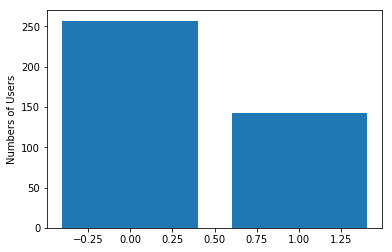

In [9]:
#how many users were in each category ?
left_count = left.count()

plt.bar(left_count.index.values, left_count['User ID'])
plt.ylabel("Numbers of Users")
plt.show()

In [10]:
# ratio of users that did bought the Ads were only 36%

data.Purchased.value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [11]:
float(data.Purchased.value_counts()[1])/len(data) * 100

35.75

In [12]:
data['Age Category'] = ['iGen' if 0<age<25 else 'Millenials' if 24<age<40 else 'GenX' if 39<age<56 else 'BabyBoomers' if 55<age<74 else None \
 for age in list(data['Age'].values)]

In [13]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category
0,15624510,1,19,19000,0,iGen
1,15810944,1,35,20000,0,Millenials
2,15668575,0,26,43000,0,Millenials
3,15603246,0,27,57000,0,Millenials
4,15804002,1,19,76000,0,iGen


In [14]:
data['Income Category'] = pd.qcut(data['EstimatedSalary'],3,labels=['Low','Medium','High'])

In [26]:
#creating a LabelEncoder object
from sklearn.preprocessing import LabelEncoder

le= LabelEncoder()
#invoking fit_transform method on object
data['Age Category']=le.fit_transform(data['Age Category'])
data['Income Category']=le.fit_transform(data['Income Category'])

In [29]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased,Age Category,Income Category
0,15624510,1,19,19000,0,3,1
1,15810944,1,35,20000,0,2,1
2,15668575,0,26,43000,0,2,1
3,15603246,0,27,57000,0,2,2
4,15804002,1,19,76000,0,3,2


In [30]:
age_cat = data.groupby('Age Category').count()
inc_cat = data.groupby('Income Category').count()

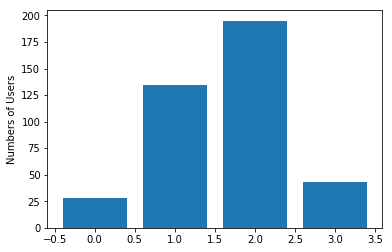

In [31]:
plt.bar(age_cat.index.values, age_cat['Age'])
plt.ylabel("Numbers of Users")
plt.show()

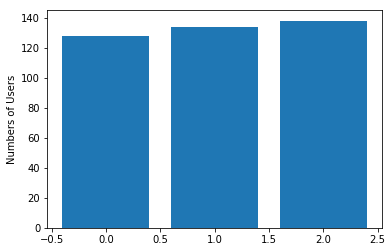

In [32]:
plt.bar(inc_cat.index.values, inc_cat['Age'])
plt.ylabel("Numbers of Users")
plt.show()

In [33]:
# data[data['Income Category'] == 'High'].max()

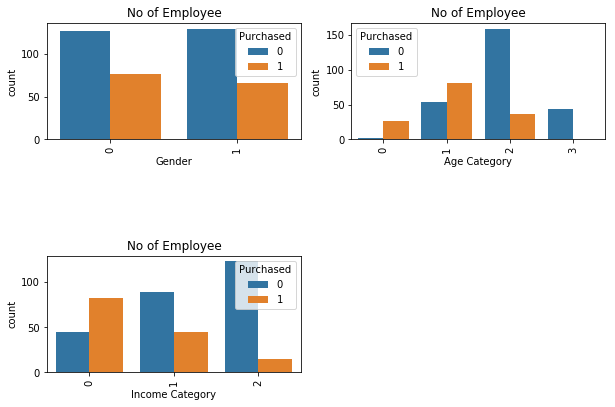

In [34]:
#whats the statistics based on those who did not make purchase

features= ['Gender', 'Age Category', 'Income Category']
fig= plt.subplots(figsize= (10,15))

for i,j in enumerate(features):
    plt.subplot(4,2, i+1)
    plt.subplots_adjust(hspace=1.0)
    sns.countplot(x=j, data=data , hue= "Purchased")
    plt.xticks(rotation= 90)
    plt.title("No of Employee")

In [35]:
data.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased',
       'Age Category', 'Income Category'],
      dtype='object')

In [36]:
# split data into features and target

x = data[['Gender', 'Age','Income Category']]
y=data['Purchased']

#train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test,y_train, y_test= train_test_split (x,y,test_size=0.3,random_state=42)

In [37]:
# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [38]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

In [39]:
# evaluating performance : Accuracy, Precision, Recall
from sklearn import metrics

print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))

Accuracy:  0.9166666666666666
Precision:  0.9512195121951219
Recall:  0.8297872340425532


In [40]:
# calculate ROC Curve
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)

ROC AUC 0.9011949868842903


In [41]:
# Plot confusion Matrix
def conftable(test,pred, imagename):
    confmatrix= metrics.confusion_matrix(y_test, y_pred)
    plt.matshow(confmatrix)
    plt.title('Confusion matrix')
    plt.colorbar()
    plt.ylabel('GroundTruth')
    plt.xlabel('Predicted')
    plt.savefig(imagename)
    
    plt.show()
    print(confmatrix)

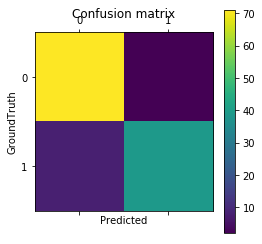

[[71  2]
 [ 8 39]]


In [42]:
conftable(y_test,y_pred,"conf")

In [43]:
# Ground Truth
pd.Series(y_test).value_counts()

0    73
1    47
Name: Purchased, dtype: int64

In [44]:
#Using Logistic regression algorithm
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

C:\Users\LANRE\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [45]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

Accuracy:  0.9166666666666666
Precision:  0.9302325581395349
Recall:  0.851063829787234
ROC AUC 0.9049839696881375


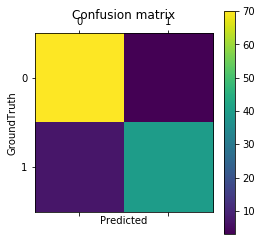

[[70  3]
 [ 7 40]]


In [46]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")

In [47]:
#Using Random forest algorithm
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [48]:
# Predicting the Test set results
y_pred = classifier.predict(x_test)

Accuracy:  0.85
Precision:  0.8918918918918919
Recall:  0.7021276595744681
ROC AUC 0.8236665695132614


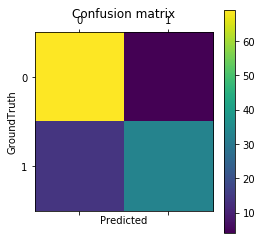

[[69  4]
 [14 33]]


In [49]:
print("Accuracy: ", metrics.accuracy_score(y_test, y_pred))
print("Precision: ", metrics.precision_score(y_test, y_pred))
print("Recall: ", metrics.recall_score(y_test, y_pred))
fpr, tpr, thresholds = roc_curve (y_test, y_pred)
roc_auc= auc (fpr, tpr)
print  ("ROC AUC", roc_auc)
conftable(y_test,y_pred,"conf")